In [1]:
import numpy as np                        # Import numpy module
import sounddevice as sd                  # Import sounddevice module for "real-time" sound playback
import os, time
import matplotlib.pyplot as plt

In [2]:
# Set sample rate for audio output
sd.default.samplerate = 44100

# Audio stream
stream = sd.OutputStream(samplerate=sd.default.samplerate, channels=1, dtype='float32')

In [3]:
def get_pure_tone(freq, duration, sample_rate=44100):
    x = np.linspace(0, duration * freq * 2*np.pi, int(duration*sample_rate), dtype=np.float32)
    return np.sin(x)

### Play pure tone of a sample frequency

In [6]:
freq = 880     # in Hz
duration = 1   # in sec
sample_rate = sd.default.samplerate  # usually 44100
volume = 0.5   # percent 0 - 1

stream.start()
stream.write(get_pure_tone(freq, duration, sample_rate) * volume)
stream.stop()

In [7]:
duration = 0.2  # in sec
volume = 0.5    # percent 0 - 1

# C-major scale frequencies
C_major = (261, 293, 329, 349, 392, 440, 494, 523)

stream.start()
for freq in C_major:
    x = np.linspace(0, duration * freq * 2*np.pi, int(duration * sd.default.samplerate), dtype=np.float32)
    pure_tone = np.sin(x)
    stream.write(pure_tone * volume)
    
stream.stop()

### Plot pure tone

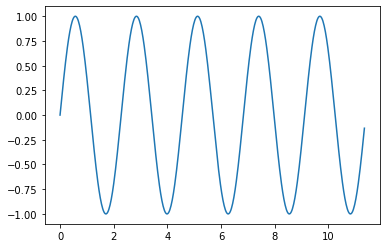

In [9]:
A_pure_tone = get_pure_tone(440, 1)
plt.plot(np.linspace(0, 1000*(500./44100.), 500), A_pure_tone[:500])  # first 500 samples